# Boston Housing Linear Regression

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

In [2]:
from sklearn.datasets import load_boston

In [3]:
boston = load_boston()
boston_df = pd.DataFrame()

C:\Users\saumi\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:87: FutureWarning: Function load_boston is deprecated; `load_boston` is deprecated in 1.0 and will be removed in 1.2.

    The Boston housing prices dataset has an ethical problem. You can refer to
    the documentation of this function for further details.

    The scikit-learn maintainers therefore strongly discourage the use of this
    dataset unless the purpose of the code is to study and educate about
    ethical issues in data science and machine learning.

    In this special case, you can fetch the dataset from the original
    source::

        import pandas as pd
        import numpy as np


        data_url = "http://lib.stat.cmu.edu/datasets/boston"
        raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
        data = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
        target = raw_df.values[1::2, 2]

    Alternative datasets include the California housing dataset (

In [4]:
boston_df = pd.DataFrame(boston.data)

In [5]:
boston_df.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,396.90,4.98
1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,396.90,9.14
2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,392.83,4.03
3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,394.63,2.94
4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,396.90,5.33


In [6]:
print(boston.feature_names)

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [7]:
boston_df.columns = boston.feature_names

In [8]:
boston_df = pd.read_csv('housing.csv')
boston_df['MEDV']

0      504000.0
1      453600.0
2      728700.0
3      701400.0
4      760200.0
         ...   
484    470400.0
485    432600.0
486    501900.0
487    462000.0
488    249900.0
Name: MEDV, Length: 489, dtype: float64

In [9]:
features = boston_df[['RM', 'LSTAT', 'PTRATIO']]
prices = boston_df[['MEDV']]

In [10]:
features.head()

,RM,LSTAT,PTRATIO
0,6.575,4.98,15.3
1,6.421,9.14,17.8
2,7.185,4.03,17.8
3,6.998,2.94,18.7
4,7.147,5.33,18.7


In [14]:
prices.head()

,MEDV
0,504000.0
1,453600.0
2,728700.0
3,701400.0
4,760200.0


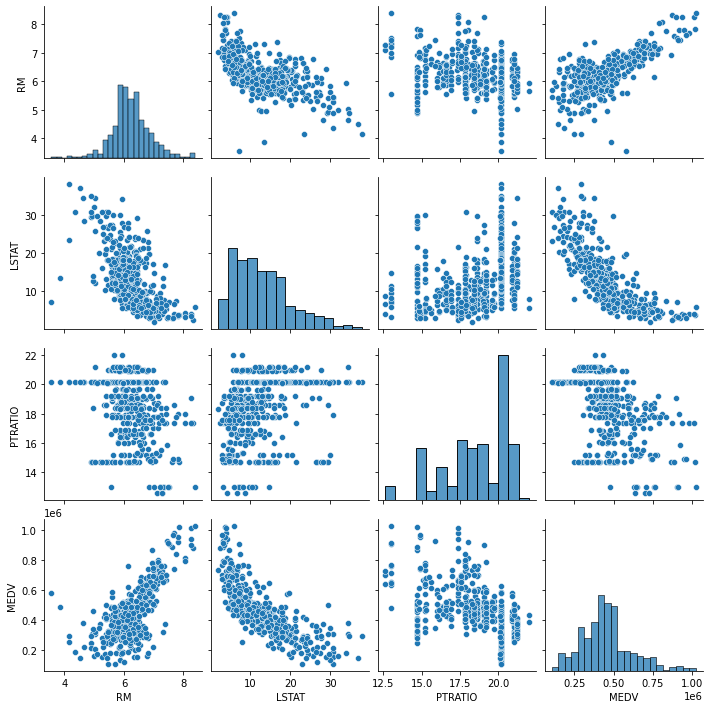

In [17]:
sns.pairplot(boston_df)

In [16]:
prices.min()

MEDV    105000.0
dtype: float64

<AxesSubplot:>

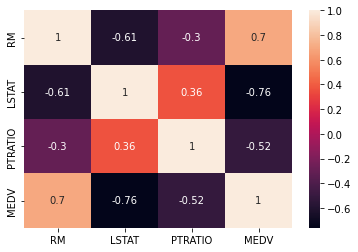

In [19]:
sns.heatmap(boston_df.corr(), annot=True)

<AxesSubplot:xlabel='MEDV', ylabel='Density'>

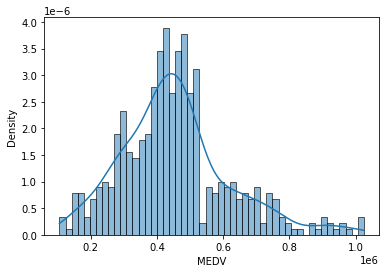

In [21]:
sns.histplot(x='MEDV', data=boston_df, kde=True, stat='density', bins=50)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
features_train, features_test, prices_train, prices_test = train_test_split(features, prices, test_size=0.3)

In [29]:
from sklearn.linear_model import LinearRegression

In [35]:
lm = LinearRegression()

In [36]:
lm.fit(features_train, prices_train)

LinearRegression()

In [43]:
cdf = pd.DataFrame(lm.coef_)

In [45]:
cdf = cdf.T

In [46]:
cdf

,0
0,74561.897290
1,-11641.037578
2,-20418.155841


In [47]:
cdf.index = features.columns

In [48]:
cdf.columns = ['Coeff']

In [49]:
cdf.head()

,Coeff
RM,74561.897290
LSTAT,-11641.037578
PTRATIO,-20418.155841


In [52]:
predictions = lm.predict(features_test)

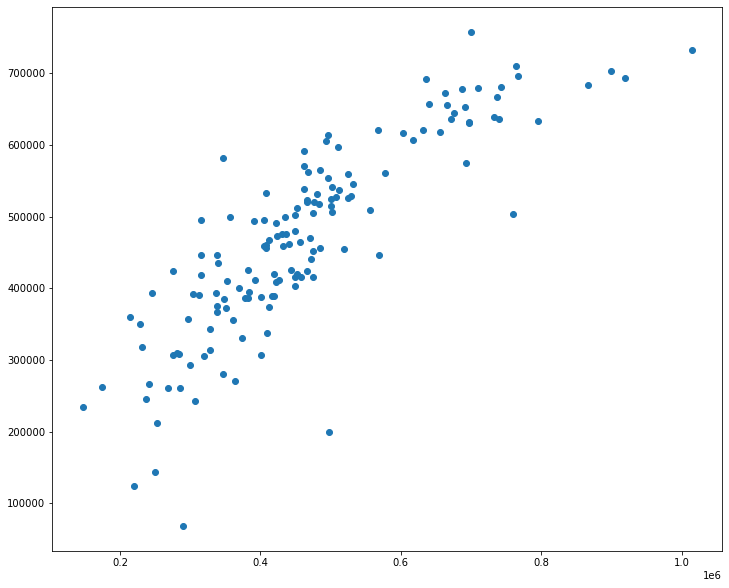

In [55]:
plt.figure(figsize=(12, 10))
plt.scatter(prices_test, predictions)

In [59]:
lm.score(features, prices)*100

71.603210475513